In [1]:
import pandas as pd
import os 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
userhome = os.path.expanduser('~')
csvfile = userhome + r'/Desktop/Python/End2EndProjects/Data/Netflix.csv'
df = pd.read_csv(csvfile)

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

In [5]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
Min_date = df.index.min()
Max_date = df.index.max()
print ("First date is",Min_date)
print ("Last date is",Max_date)
print (Max_date - Min_date)

First date is 2002-05-23 00:00:00
Last date is 2020-08-03 00:00:00
6647 days 00:00:00


In [7]:
df = df.drop(columns=['High', 'Low', 'Close', 'Adj Close', 'Volume'])

In [8]:
num = 20 
df['label'] = df['Open'].shift(-num)
print(df.shape)

(4581, 2)


In [9]:
Data = df.drop(['label'],axis=1)

In [10]:
X = Data.values
X = preprocessing.scale(X) 
X = X[:-num]

In [11]:
df.dropna(inplace=True)
Target = df.label
y = Target.values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test , y_test)

0.9816524108713008

In [14]:
X_Predict = X[-num:]
Forecast = model.predict(X_Predict)
print(Forecast)

[426.26606783 432.04743316 446.73109957 438.74974947 439.56833846
 431.79162026 436.25301355 452.68643097 459.75710353 460.15615527
 466.18312247 477.94027297 480.02771541 470.1226155  477.82773064
 456.17572297 461.07707556 465.14962813 497.52532369 492.54206186]


In [15]:
Date = np.array(df.index) 
last_Date = Date[len(Date)-1]
print(last_Date)

2020-07-06T00:00:00.000000000


In [16]:
trange = pd.date_range('2020-07-06', periods=num, freq='d')
trange

DatetimeIndex(['2020-07-06', '2020-07-07', '2020-07-08', '2020-07-09',
               '2020-07-10', '2020-07-11', '2020-07-12', '2020-07-13',
               '2020-07-14', '2020-07-15', '2020-07-16', '2020-07-17',
               '2020-07-18', '2020-07-19', '2020-07-20', '2020-07-21',
               '2020-07-22', '2020-07-23', '2020-07-24', '2020-07-25'],
              dtype='datetime64[ns]', freq='D')

In [17]:
Predict_df = pd.DataFrame(Forecast, index=trange)
Predict_df.columns = ['Forecast']
Predict_df

,Forecast
2020-07-06,426.266068
2020-07-07,432.047433
2020-07-08,446.731100
2020-07-09,438.749749
2020-07-10,439.568338
2020-07-11,431.791620
2020-07-12,436.253014
2020-07-13,452.686431
2020-07-14,459.757104
2020-07-15,460.156155


In [18]:
df_concat = pd.concat([df, Predict_df], axis=1)
df_concat.tail(num)

,Open,label,Forecast
2020-07-06,480.769989,490.859985,426.266068
2020-07-07,NaN,NaN,432.047433
2020-07-08,NaN,NaN,446.731100
2020-07-09,NaN,NaN,438.749749
2020-07-10,NaN,NaN,439.568338
2020-07-11,NaN,NaN,431.791620
2020-07-12,NaN,NaN,436.253014
2020-07-13,NaN,NaN,452.686431
2020-07-14,NaN,NaN,459.757104
2020-07-15,NaN,NaN,460.156155


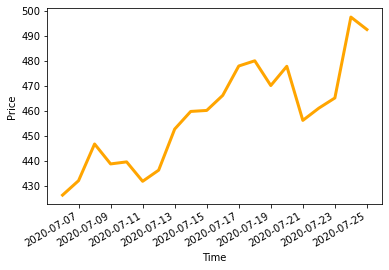

In [19]:
df_concat['Forecast'].plot(color='orange', linewidth=3)
plt.xlabel('Time')
plt.ylabel('Price')
plt.savefig(userhome + r'/Desktop/Python/End2EndProjects/Netflix_API/static/img/plot.png')
plt.show()



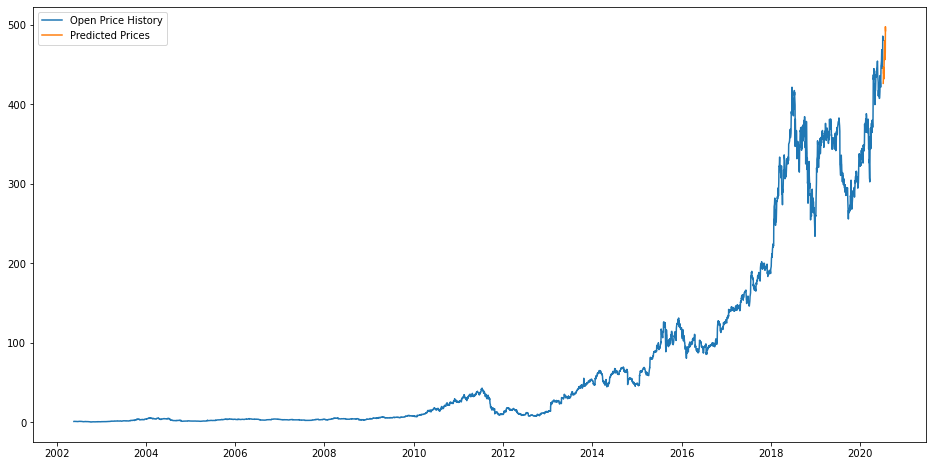

In [20]:
#Plot the actual data
plt.figure(figsize=(16,8))
plt.plot(df['Open'], label='Open Price History')
plt.plot(df_concat['Forecast'], label='Predicted Prices')

#display the legends
plt.legend()
#display the graph
plt.show()